In [94]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats
import statsmodels.tools.numdiff as nd
import seaborn as sns
sns.set()
%matplotlib inline

In [95]:
# Define the simulation parameters
num_div = 500 

# Set the number of proteins for each mother.
n_tot = np.random.gamma(5, 25, size=num_div)

# Convert n_tot to integers. 
n_tot = n_tot.astype(int)

Text(0,0.5,'count')

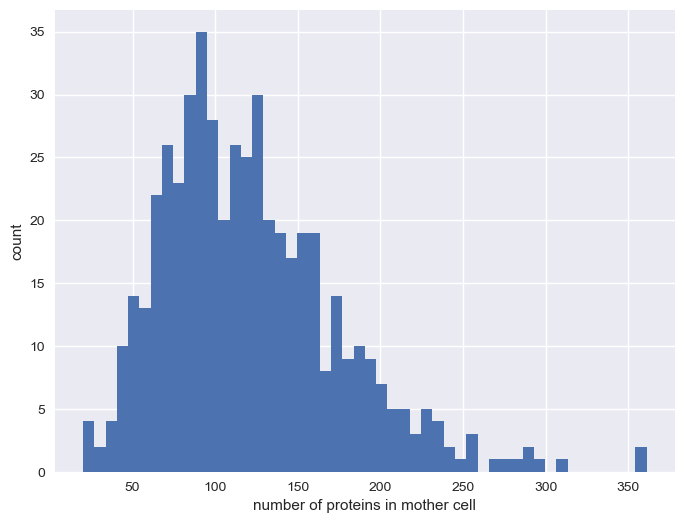

In [96]:
# Make a histogram of n_tot
plt.hist(n_tot, bins=50)
plt.xlabel('number of proteins in mother cell')
plt.ylabel('count')

In [97]:
# Binomially distribute into daughters. 
n_1 = np.random.binomial(n_tot, p=0.5)
n_2 = n_tot - n_1

In [98]:
# Define alpha with a known value. 
alpha_seed = 100  # in units of [a.u.]

# Convert n_1 and n_2 to intensity. 
I_1 = alpha_seed * n_1 + np.random.normal(0, 20, size=num_div)
I_2 = alpha_seed * n_2 + np.random.normal(0, 20, size=num_div)
I_tot = alpha_seed * n_tot + np.random.normal(0, 20, size=num_div)

Text(0,0.5,'$(I_1 - I_2)^2$')

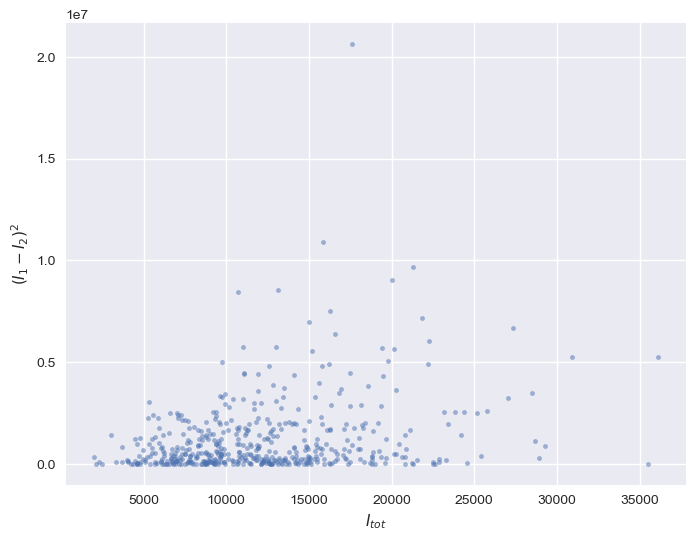

In [99]:
# Compute square difference.
sq_diff = (I_1 - I_2)**2

# make the plot.
plt.plot(I_tot, sq_diff, '.', label='data',
        alpha=0.5)
plt.xlabel('$I_{tot}$')
plt.ylabel('$(I_1 - I_2)^2$')

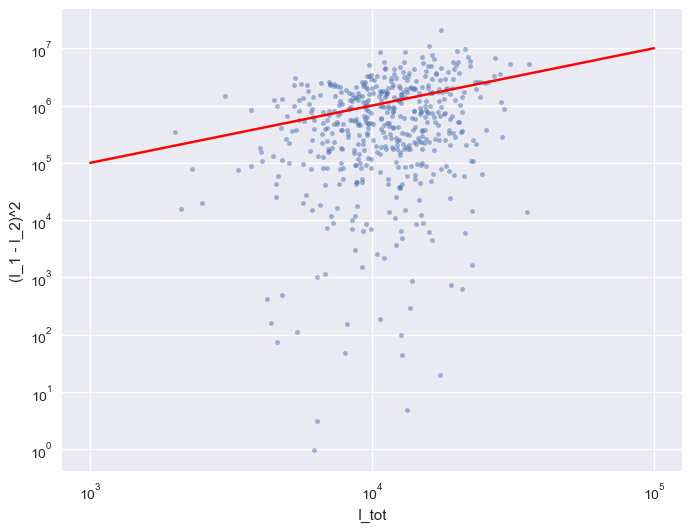

In [100]:
# Make a plot with loglog.
plt.plot(I_tot, sq_diff,'.', alpha=0.5)
plt.xlabel('I_tot')
plt.ylabel('(I_1 - I_2)^2')
plt.xscale('log')
plt.yscale('log')

# Plot the prediction. 
I_tot_range = np.logspace(3, 5, 100)
theory = alpha_seed * I_tot_range
plt.plot(I_tot_range, theory, 'r-')


In [101]:
# Write the log posterior for the determinstic solution
def log_post(alpha, I_1, I_2):
    # Ensure positivity of alpha
    if alpha < 0:
        return -np.inf
    
    # Compute N1 and N2 from I1 and I2
    n_1 = I_1 / alpha
    n_2 = I_2 / alpha
    n_tot = n_1 + n_2
    
    # Approximate the binomial coefficient. 
    binom = scipy.special.gammaln(n_tot + 1).sum() - scipy.special.gammaln(n_1 + 1).sum() -\
            scipy.special.gammaln(n_2 + 1).sum()
    
    # Assemble the full posterior.
    lp = binom - n_tot.sum() * np.log(2) - len(I_1) * np.log(alpha)
    return lp 
    

In [102]:
# Set up a range of alpha. 
alpha_range = np.linspace(50, 200, 500)

# Evaluate the log posterior for each alpha. 
log_posterior = []
for a  in alpha_range:
    # Compute the log posterior
    lp = log_post(a, I_1, I_2)
    
    # Add to the list. 
    log_posterior.append(lp)
    

In [103]:
# Rescale the posterior and normalize.
log_posterior = np.array(log_posterior)
rescaled = log_posterior + np.abs(np.min(log_posterior))
posterior = np.exp(rescaled) / np.exp(rescaled).sum()


Text(0,0.5,'normalized posterior')

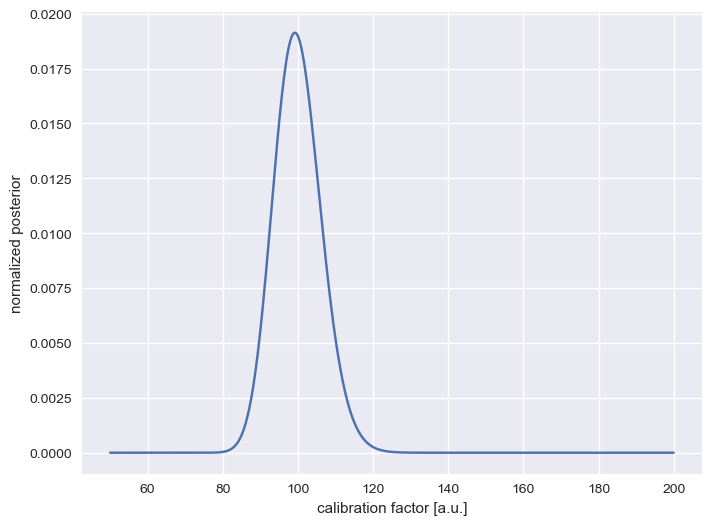

In [104]:
# Plot the posterior over alpha. 
plt.plot(alpha_range, posterior, '-')
plt.xlabel('calibration factor [a.u.]')
plt.ylabel('normalized posterior')